In [1]:
import pandas as pd
import json
import seaborn as sns


In [2]:
%matplotlib inline

# Load data from json

In [3]:
DATA_PATH = 'data/lesetagebuch-florian.json'
df = pd.read_json(DATA_PATH)
df

,entries,name,url,username
0,"{'book': {'authors': [{'id': 7675, 'name': 'Ta...",Florian,/von/florian,florian
1,"{'book': {'authors': [{'id': 78, 'name': 'J. R...",Florian,/von/florian,florian
2,"{'book': {'authors': [{'id': 8279, 'name': 'Gr...",Florian,/von/florian,florian
3,"{'book': {'authors': [{'id': 12393, 'name': 'M...",Florian,/von/florian,florian
4,"{'book': {'authors': [{'id': 12379, 'name': 'T...",Florian,/von/florian,florian
...,...,...,...,...
176,"{'book': {'authors': [{'id': 278, 'name': 'Sam...",Florian,/von/florian,florian
177,"{'book': {'authors': [{'id': 24, 'name': 'Malc...",Florian,/von/florian,florian
178,"{'book': {'authors': [{'id': 12, 'name': 'Volk...",Florian,/von/florian,florian
179,"{'book': {'authors': [{'id': 2477, 'name': 'Jo...",Florian,/von/florian,florian


In [4]:
with open(DATA_PATH) as fp:
    books = json.load(fp)


# Set up dataframe with desired structure and types

In [5]:
books['entries'][0]

{'book': {'authors': [{'id': 7675,
    'name': 'Tara Westover',
    'url': '/autor/tara-westover'}],
  'id': 16492,
  'pages': 352,
  'title': 'Educated',
  'url': '/buch/educated'},
 'book_type': 'book',
 'comment': 'An intense memoir about a childhood that was defined by religious fanaticism and a manipulative family. Crazy to think Tara Westover is only two years older than me, as her story sounds like it comes from a different age, from a different world even.',
 'date': '2021-12-06',
 'id': 46975,
 'pinned': False,
 'private': False,
 'rating': 5,
 'tags': ['author_f', 'english', 'nonfiction', 'biography'],
 'type': 'finished',
 'url': '/eintrag/46975',
 'user': {'username': 'florian'}}

In [7]:
def _author_gender(tags):
    gender_tags = {
        'author_m': 'Male',
        'author_f': 'Female',
        'author_d': 'Diverse / Multiple',
    }
    for tag in tags:
        if tag.lower() in gender_tags:
            return gender_tags[tag]
    return 'Unknown'

def _language(tags):
    for lang in ('German', 'English'):
        if lang.lower() in tags:
            return lang
    return 'Unknown'

def _genre(tags):
    nonfiction_tags = [
        'nonfiction',
        'history',
        'finance',
        'science',
        'ww2',
        'business',
        'biography',
        'coding',
        'philosophy',
        'feminism']
    fiction_tags = [
        'fiction',
        'novel',
        'fantasy']
    
    if any(t in tags for t in nonfiction_tags):
        return 'nonfiction'
    if any(t in tags for t in fiction_tags):
        return 'fiction'
    
    return 'unknown'

drop_keys = ['book', 'user']
books_flat = [
    {
        **{k:v for k, v in book.items() if k not in drop_keys},
        **{
            'author': book['book']['authors'][0]['name'],
            'title': book['book']['title'],
            'book_pages': book['book']['pages'],
            'username': book['user']['username'],
            'language': _language(book.get('tags')),
            'author_gender': _author_gender(book.get('tags')),
            'genre': _genre(book.get('tags'))
         }
    }
    for book in books['entries']
]

df = pd.DataFrame(books_flat)
df['date'] = df.date.str.replace('00', '01')  # fallback dates were day not specified
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# ignore 'wished' items
df = df[df.type=='finished']
df

,book_type,comment,date,id,pinned,private,rating,tags,type,url,author,title,book_pages,username,language,author_gender,genre
0,book,An intense memoir about a childhood that was d...,2021-12-06,46975,False,False,5.0,"[author_f, english, nonfiction, biography]",finished,/eintrag/46975,Tara Westover,Educated,352,florian,English,Female,nonfiction
1,audio_book,"Meine jährliche Dosis Tolkien, das macht mich ...",2021-11-28,46936,False,False,5.0,"[german, author_m, fiction, fantasy]",finished,/eintrag/46936,J. R. R. Tolkien,Der Herr der Ringe: Die Gefährten,526,florian,German,Male,fiction
2,book,Der Inhalt der Texte ist natürlich gut. Aber d...,2021-11-14,46737,False,False,2.0,"[german, nonfiction, author_f]",finished,/eintrag/46737,Greta Thunberg,"Ich will, dass ihr in Panik geratet!",112,florian,German,Female,nonfiction
3,book,Ich habe gelernt: Es gibt das Genre „Weinkrimi...,2021-10-18,44373,False,False,3.0,"[german, nonfiction, author_m, novel]",finished,/eintrag/44373,Michael Böckler,Tod oder Reben,432,florian,German,Male,nonfiction
4,book,"Kompakte Übersicht über das Thema ""Data Engine...",2021-10-10,44298,False,False,3.0,"[english, author_m, nonfiction, coding]",finished,/eintrag/44298,Ted Malaska,Rebuilding Reliable Data Pipelines Through Mod...,97,florian,English,Male,nonfiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,book,I've started reading through some of the class...,2013-02-25,1583,False,False,5.0,"[author_m, fiction, novel, scifi, english]",finished,/eintrag/1583,H.G. Wells,The Time Machine,128,florian,English,Male,fiction
175,book,Interesting read to learn about Apple's histor...,2013-02-22,1552,False,False,3.0,"[author_m, nonfiction, tech, biography, english]",finished,/eintrag/1552,Leander Kahney,Inside Steve's Brain,320,florian,English,Male,nonfiction
176,book,Some kind of biography about Richard Stallman ...,2013-02-12,1457,False,False,4.0,"[author_m, nonfiction, tech, biography, english]",finished,/eintrag/1457,Sam Williams,Free as in Freedom,264,florian,English,Male,nonfiction
177,book,"Interessant zu erfahren, dass manchmal eine sp...",2013-01-23,1019,False,False,3.0,"[author_m, nonfiction, english]",finished,/eintrag/1019,Malcolm Gladwell,Blink!,304,florian,English,Male,nonfiction


# Genre

In [8]:
df.genre.value_counts()

fiction       95
nonfiction    83
Name: genre, dtype: int64

In [9]:
df[df.genre=='unknown'].loc[:,['id', 'title', 'tags']]

,id,title,tags


#  Mostly paper books, few audio books

In [7]:
# df.book_type.value_counts().plot(kind='pie', leg)

# How many books per year

In [10]:
yearly_stats = (
    df.assign(
        year=lambda entry: entry['date'].dt.year
    )
    .groupby('year')[['title', 'book_pages']]
).agg({
    'title': 'count',
    'book_pages': 'sum'
})
yearly_stats

,title,book_pages
year,,
2013,24,6237
2014,13,4688
2015,8,3119
2016,15,5724
2017,23,8161
2018,20,6458
2019,29,9727
2020,24,9677
2021,22,7669


## How many _books_ have I read each year?

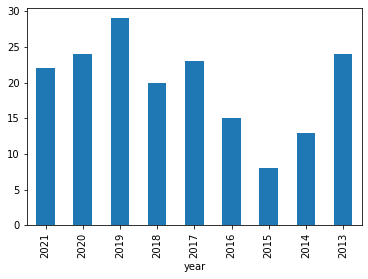

In [11]:
yearly_stats['title'].sort_index(ascending=False).plot(kind='bar')

## How many _pages_ have I read each year?

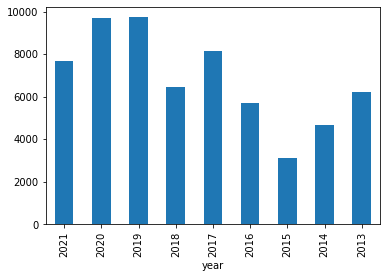

In [12]:
yearly_stats['book_pages'].sort_index(ascending=False).plot(kind='bar')

# What's the month where I read the most?

In [13]:
years = df.assign(
    year=lambda entry: entry['date'].dt.year
)['year']
num_years = len(years.unique())
num_years

9

In [14]:
monthly_stats = (
    df.assign(
        month=lambda entry: entry['date'].dt.month
    )
    .groupby('month')[['title', 'book_pages']]
).agg({
    'title': 'count',  # FIXME: I need the mean of the count instead!
    'book_pages': 'mean'
}).rename(
    columns={
        'title': 'books_num_total',
        'book_pages': 'pages_per_month'
    }
).assign(
    books_per_month=lambda entry: (entry['books_num_total'] / num_years)
)[
    ['pages_per_month', 'books_per_month']
]
monthly_stats

,pages_per_month,books_per_month
month,,
1,311.105263,2.111111
2,367.900000,2.222222
3,390.111111,1.000000
4,404.700000,1.111111
5,416.000000,1.111111
6,438.333333,0.666667
7,315.090909,1.222222
8,329.416667,1.333333
9,419.352941,1.888889


## December is when I read most books
...to hit the reading goal?

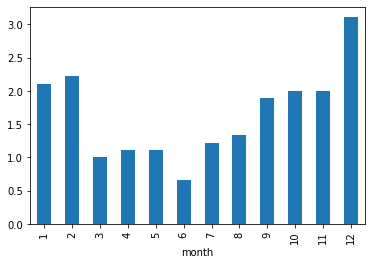

In [15]:
monthly_stats['books_per_month'].sort_index().plot(kind='bar')

## However, books read in December are shorter on average
Is it easier to hit the reading goal that way?

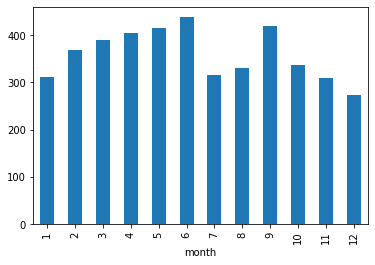

In [16]:
monthly_stats['pages_per_month'].sort_index().plot(kind='bar')

In [15]:
# Do I like the books I read?

# Ratings

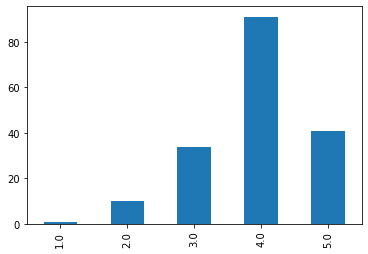

In [17]:
df_rated = (
    df
    [df.rating.notnull()]
    [df.rating>0]
)
df_rated.rating.value_counts().sort_index().plot(kind='bar')

In [18]:
# Odd: some non-rated books have rating None, some have rating 0.0
print(len(df[df.rating.isna()]))
print(len(df[df.rating.isnull()]))
print(len(df[df.rating==0.0]))
df[df.rating==0.0]

0
0
1


,book_type,comment,date,id,pinned,private,rating,tags,type,url,author,title,book_pages,username,language,author_gender,genre
40,book,"Read this as part of our ""Data Science Study G...",2020-07-13,37486,False,False,0.0,"[english, science, tech, author_m, coding]",finished,/eintrag/37486,Steven S. Skiena,The Data Science Design Manual,445,florian,English,Male,nonfiction


## Distribution of book lengths

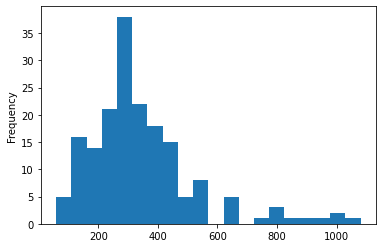

In [19]:
df_rated.book_pages.plot.hist(bins=20)

## Do I rate longer books higher?

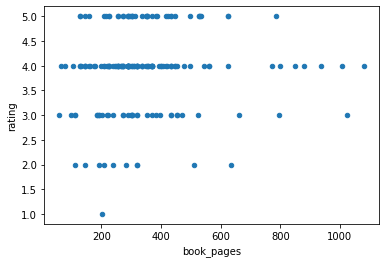

In [20]:
df_rated.plot.scatter(x='book_pages', y='rating')

# Split books in short / medium / long

In [21]:
# auto split is not to my taste. "long" should start later
pd.qcut(df.book_pages, 3).value_counts()

(271.0, 368.0]     63
(58.999, 271.0]    60
(368.0, 1080.0]    55
Name: book_pages, dtype: int64

In [22]:
# I want to call the middle 50% "Medium" and distribute the other lengths equally to the sides
pd.qcut(df.book_pages, [0, 0.25, 0.75, 1.]).value_counts()

(228.0, 416.0]     89
(58.999, 228.0]    45
(416.0, 1080.0]    44
Name: book_pages, dtype: int64

In [23]:
# Now actually assign some names
book_length = pd.qcut(df.book_pages, [0, 0.25, 0.75, 1.], labels=['Short', 'Medium', 'Long'])
book_length.value_counts()

Medium    89
Short     45
Long      44
Name: book_pages, dtype: int64

# How do ratings vary by book length and paper vs. audio book (pivot table!)

In [24]:
rating_per_length_and_type = df.assign(
    book_length=book_length
).pivot_table(
    values='rating',
    index='book_length',
    columns='book_type'
)
rating_per_length_and_type

book_type,audio_book,book
book_length,,
Short,NaN,3.688889
Medium,4.125,3.975309
Long,4.250,3.850000


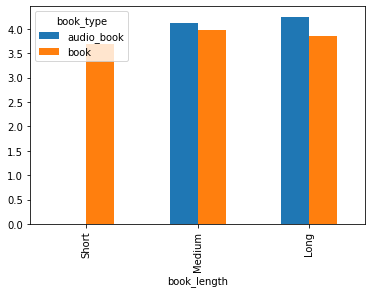

In [25]:
rating_per_length_and_type.plot.bar()

In [26]:
pages_per_rating = df_rated[
    ['rating', 'book_pages']
].groupby('rating').agg(['mean', 'std']).fillna(0)
pages_per_rating

book_pages            
              mean         std
rating                        
1.0     202.000000    0.000000
2.0     297.000000  163.594349
3.0     336.588235  197.600932
4.0     350.021978  195.866053
5.0     354.804878  143.483661

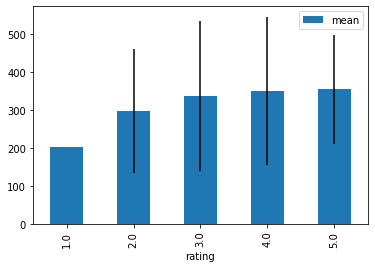

In [27]:
pages_per_rating.book_pages.plot.bar(y='mean', yerr='std')

# Do I write longer comments for longer books?

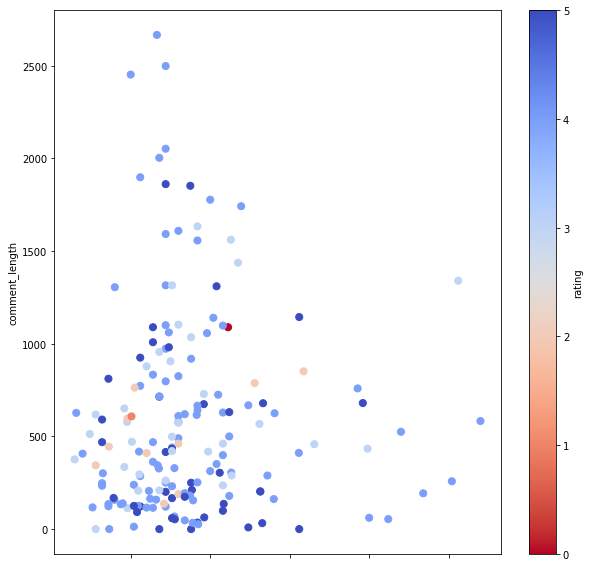

In [28]:
df.assign(
    comment_length=lambda entry: entry.comment.str.len()
).fillna(0).plot.scatter(
    x='book_pages',
    y='comment_length',
    c='rating',
    colormap='coolwarm_r',
    figsize=(10,10),
    s=50  # marker size
)

# Compare language and genre preferences over time
Currently not all books are tagged

In [29]:
for _id in df[df.language=='Unknown']['id']:
    print(f'<a href="https://lesetagebu.ch/eintrag/{_id}/edit">Edit book</a><br>')


<a href="https://lesetagebu.ch/eintrag/39711/edit">Edit book</a><br>
<a href="https://lesetagebu.ch/eintrag/38297/edit">Edit book</a><br>
<a href="https://lesetagebu.ch/eintrag/19299/edit">Edit book</a><br>
<a href="https://lesetagebu.ch/eintrag/19285/edit">Edit book</a><br>
<a href="https://lesetagebu.ch/eintrag/19227/edit">Edit book</a><br>
<a href="https://lesetagebu.ch/eintrag/4626/edit">Edit book</a><br>
<a href="https://lesetagebu.ch/eintrag/4004/edit">Edit book</a><br>


In [30]:
table_1 = pd.pivot_table(
    df.assign(
        year=lambda entry: entry['date'].dt.year
    ),
    index='year',
    columns='language',
    
    # count number of books (=number of titles)
    values='title',
    aggfunc='count',
    
    # prepare so that we can calculate percentages in next step
    fill_value=0,
    margins=True
)
table_1

language,English,German,Unknown,All
year,,,,
2013,11,11,2,24
2014,8,5,0,13
2015,4,4,0,8
2016,10,5,0,15
2017,11,9,3,23
2018,9,11,0,20
2019,18,11,0,29
2020,18,5,1,24
2021,15,6,1,22


In [31]:
# Display percentages
table_2 = table_1.div(table_1.All, axis=0)
table_2

language,English,German,Unknown,All
year,,,,
2013,0.458333,0.458333,0.083333,1.0
2014,0.615385,0.384615,0.000000,1.0
2015,0.500000,0.500000,0.000000,1.0
2016,0.666667,0.333333,0.000000,1.0
2017,0.478261,0.391304,0.130435,1.0
2018,0.450000,0.550000,0.000000,1.0
2019,0.620690,0.379310,0.000000,1.0
2020,0.750000,0.208333,0.041667,1.0
2021,0.681818,0.272727,0.045455,1.0


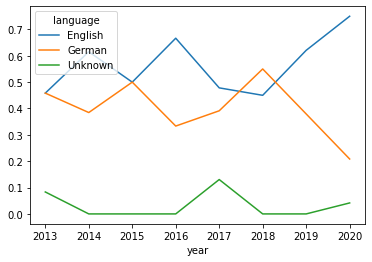

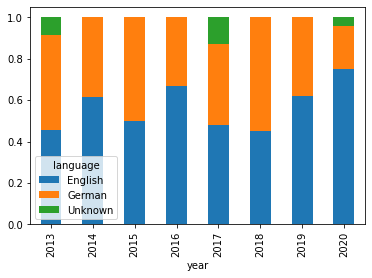

In [32]:
tagged_years = table_2.loc[
    [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
][
    ['English', 'German', 'Unknown']  # hide 'All'
]
tagged_years.plot.line()
tagged_years.plot.bar(stacked=True)

## Author gender distribution

In [33]:
table_gender_1 = pd.pivot_table(
    df.assign(
        year=lambda entry: entry['date'].dt.year
    ),
    index='year',
    columns='author_gender',
    
    # count number of books (=number of titles)
    values='title',
    aggfunc='count',
    
    # prepare so that we can calculate percentages in next step
    fill_value=0,
    margins=True
)
table_gender_1

author_gender,Diverse / Multiple,Female,Male,All
year,,,,
2013,0,3,21,24
2014,0,4,9,13
2015,0,0,8,8
2016,0,2,13,15
2017,0,4,19,23
2018,0,3,17,20
2019,1,5,23,29
2020,0,2,22,24
2021,1,10,11,22


In [34]:
# Display percentages
table_gender_2 = table_gender_1.div(table_gender_1.All, axis=0)
table_gender_2

author_gender,Diverse / Multiple,Female,Male,All
year,,,,
2013,0.000000,0.125000,0.875000,1.0
2014,0.000000,0.307692,0.692308,1.0
2015,0.000000,0.000000,1.000000,1.0
2016,0.000000,0.133333,0.866667,1.0
2017,0.000000,0.173913,0.826087,1.0
2018,0.000000,0.150000,0.850000,1.0
2019,0.034483,0.172414,0.793103,1.0
2020,0.000000,0.083333,0.916667,1.0
2021,0.045455,0.454545,0.500000,1.0


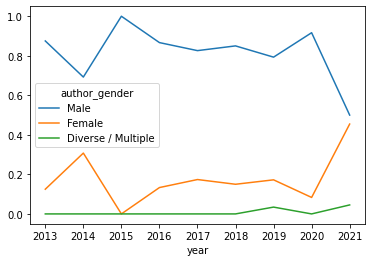

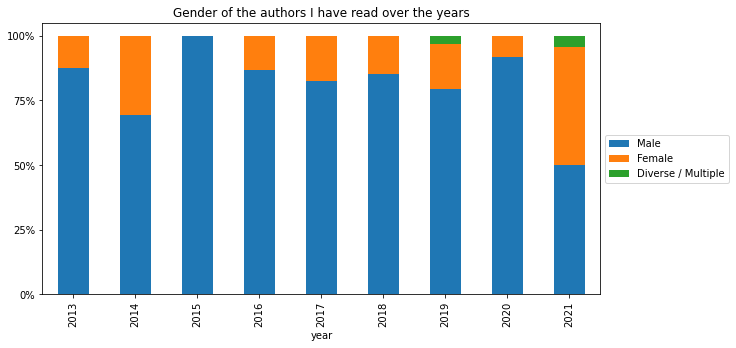

In [36]:
tagged_years = table_gender_2.loc[
    [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
][
    ['Male', 'Female', 'Diverse / Multiple']  # hide 'All'
]
tagged_years.plot.line()
ax = tagged_years.plot.bar(
    title='Gender of the authors I have read over the years',
    stacked=True,
    yticks=([0, 0.25, 0.5, 0.75, 1.0]),
    figsize=(10,5),
#     colormap='tab20b'
)
ax.set_yticklabels(['0%', '25%', '50%', '75%', '100%'])
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

